In [99]:
#importing dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("flight.csv")


df.head()

,Unnamed: 0,acc.date,type,reg,operator,fat,location,dmg
0,0,3 Jan 2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,0,near Venetia Mine Airport,sub
1,1,4 Jan 2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA - Línea Aérea Nacional de Honduras S.A,0,Roatán-Juan Manuel Gálvez International Airpor...,sub
2,2,5 Jan 2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,0,Isfahan-Shahid Beheshti Airport (IFN),sub
3,3,8 Jan 2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",0,Hangzhou Xiaoshan International Airport (HGH),w/o
4,4,12 Jan 2022,Beechcraft 200 Super King Air,NaN,private,0,"Machakilha, Toledo District, Grahem Creek area",w/o


In [100]:
df.shape

(2500, 8)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2500 non-null   int64 
 1   acc.date    2500 non-null   object
 2   type        2500 non-null   object
 3   reg         2408 non-null   object
 4   operator    2486 non-null   object
 5   fat         2488 non-null   object
 6   location    2500 non-null   object
 7   dmg         2500 non-null   object
dtypes: int64(1), object(7)
memory usage: 156.4+ KB


In [102]:
df.isna().sum()

Unnamed: 0     0
acc.date       0
type           0
reg           92
operator      14
fat           12
location       0
dmg            0
dtype: int64

DATA CLEANING

In [103]:
# Drop the unnamed column because it has nothing useful its just index
df = df.drop(columns=["Unnamed: 0"])

In [104]:
#Convert to datetime since it is in text
df["acc.date"] = pd.to_datetime(df["acc.date"], errors="coerce")


In [105]:
#fat are the number of fatalities
#according to the data the fat is in text. Convert it to number
#we use coerce incase there is entries that cant be converted theyll be turned to NaN
df["fat"] = pd.to_numeric(df["fat"], errors="coerce")


In [106]:
#Fill NaN values with 0 since if it is empty it means there are no fatalities
df["fat"] = df["fat"].fillna(0)


In [107]:
# Keep only the relevant columns needed for easy understanding
relevant_columns = [
    "acc.date", "type", "operator", "fat", "dmg"
]

In [108]:
df = df[relevant_columns]

df

,acc.date,type,operator,fat,dmg
0,2022-01-03,British Aerospace 4121 Jetstream 41,SA Airlink,0.0,sub
1,2022-01-04,British Aerospace 3101 Jetstream 31,LANHSA - Línea Aérea Nacional de Honduras S.A,0.0,sub
2,2022-01-05,Boeing 737-4H6,Caspian Airlines,0.0,sub
3,2022-01-08,Tupolev Tu-204-100C,"Cainiao, opb Aviastar-TU",0.0,w/o
4,2022-01-12,Beechcraft 200 Super King Air,private,0.0,w/o
...,...,...,...,...,...
2495,2018-12-20,Cessna 560 Citation V,Chen Aircrafts LLC,4.0,w/o
2496,2018-12-22,PZL-Mielec M28 Skytruck,Guardia Nacional Bolivariana de Venezuela - GNBV,0.0,sub
2497,2018-12-24,Antonov An-26B,Air Force of the Democratic Republic of the Congo,0.0,w/o
2498,2018-12-31,Boeing 757-2B7 (WL),American Airlines,0.0,sub


In [109]:
df.isna().sum()


acc.date     6
type         0
operator    14
fat          0
dmg          0
dtype: int64

In [110]:
## Dates are not critical for this risk analysis so we will reatain the rows with NaN values

#the NaN values in operator we convert to unknown 
df["operator"] = df["operator"].fillna("Unknown")


DATA ANALYSIS

1st Finding: Which aircrafts have the fewest accidents

In [111]:
#Finding the number of accidents per aircraft
accident_counts = df["type"].value_counts().reset_index()
accident_counts

,type,count
0,Cessna 208B Grand Caravan,114
1,Antonov An-2R,58
2,Beechcraft 200 Super King Air,58
3,de Havilland Canada DHC-6 Twin Otter 300,34
4,Cessna 208 Caravan I,30
...,...,...
518,Boeing 767-375ER,2
519,Boeing 747-412 (BCF),2
520,Boeing 747-412F (SCD),2
521,Boeing 737-76N (WL),2


In [112]:
#We will rename the colums for easy readability
accident_counts.columns = ["aircraft_type", "accident_count"]

In [113]:
# sort the data to see the aircraft with the lowest accident
accident_counts.sort_values("accident_count").head(10)

,aircraft_type,accident_count
261,Britten-Norman BN-2A-8 Islander,2
356,de Havilland Canada DHC-8-402QPF Dash 8,2
355,Convair C-131B Samaritan,2
354,Boeing 767-232 (BDSF),2
353,Boeing 747-406M,2
352,Beechcraft B100 King Air,2
351,Boeing 737-322 (SF),2
350,Learjet 31,2
349,Canadair CL-600-2B19 Regional Jet CRJ-200ER,2
348,Gulfstream V,2


2nd Finding: Which aircrafts have the lowest total fatalities

In [114]:
#Finding the number of fatalities per aircraft
fatalities_by_type = df.groupby("type")["fat"].sum().reset_index()
fatalities_by_type

,type,fat
0,ATR 42-300,0.0
1,ATR 42-320,0.0
2,ATR 42-500,38.0
3,ATR 42-600,0.0
4,ATR 72-202,0.0
...,...,...
518,de Havilland Canada DHC-8-402Q (PF) Dash 8,0.0
519,de Havilland Canada DHC-8-402Q Dash 8,104.0
520,de Havilland Canada DHC-8-402QPF Dash 8,0.0
521,de Havilland Canada EO-5C (DHC-7-102),0.0


In [115]:
#We will rename the colums for easy readability
fatalities_by_type.columns = ["aircraft_type", "total_fatalities"]

In [116]:
# sort the data to see the aircraft with the lowest fatalities
fatalities_by_type.sort_values("total_fatalities").head(10)

,aircraft_type,total_fatalities
0,ATR 42-300,0.0
337,Dornier 228-202,0.0
336,Dornier 228-201,0.0
335,Dornier 228-101,0.0
334,Dassault Falcon 900EX EASy,0.0
333,Dassault Falcon 900EX,0.0
332,Dassault Falcon 900B,0.0
331,Dassault Falcon 7X,0.0
329,Dassault Falcon 20D,0.0
327,Dassault Falcon 2000EX,0.0


3rd Finding: Which aircrafts have the highest and lowest damage 

In [117]:
#Finding the number of damages per aircraft
damage_counts = df.groupby(["type", "dmg"]).size().reset_index(name="count")
damage_counts

,type,dmg,count
0,ATR 42-300,sub,2
1,ATR 42-320,non,2
2,ATR 42-320,sub,2
3,ATR 42-500,non,2
4,ATR 42-500,sub,10
...,...,...,...
677,de Havilland Canada DHC-8-402Q Dash 8,sub,18
678,de Havilland Canada DHC-8-402Q Dash 8,w/o,6
679,de Havilland Canada DHC-8-402QPF Dash 8,sub,2
680,de Havilland Canada EO-5C (DHC-7-102),sub,2


In [118]:
#Combining all the tables for easy risk analysis
risk_table = accident_counts.merge(
    fatalities_by_type, on="aircraft_type"
)

risk_table.head()

,aircraft_type,accident_count,total_fatalities
0,Cessna 208B Grand Caravan,114,82.0
1,Antonov An-2R,58,46.0
2,Beechcraft 200 Super King Air,58,16.0
3,de Havilland Canada DHC-6 Twin Otter 300,34,86.0
4,Cessna 208 Caravan I,30,8.0


In [119]:
# sort the data by lowest risk
risk_table = risk_table.sort_values(
    by=["total_fatalities", "accident_count"]
)
risk_table.head(10)

,aircraft_type,accident_count,total_fatalities
211,Airbus A340-642,2,0.0
215,Airbus CC-150 Polaris (A310-300),2,0.0
217,Embraer ERJ-195LR (ERJ-190-200 LR),2,0.0
218,Lockheed C-130A Hercules,2,0.0
219,Bombardier BD-100 Challenger 350,2,0.0
220,Bombardier Global Express,2,0.0
221,de Havilland Canada EO-5C (DHC-7-102),2,0.0
223,Cessna 525 CitationJet CJ1+,2,0.0
224,ATR 42-600,2,0.0
225,Embraer EMB-145XR,2,0.0


DATA VISUALIZATION

Scatter graph of the top 10 safest aircraft by fatalities

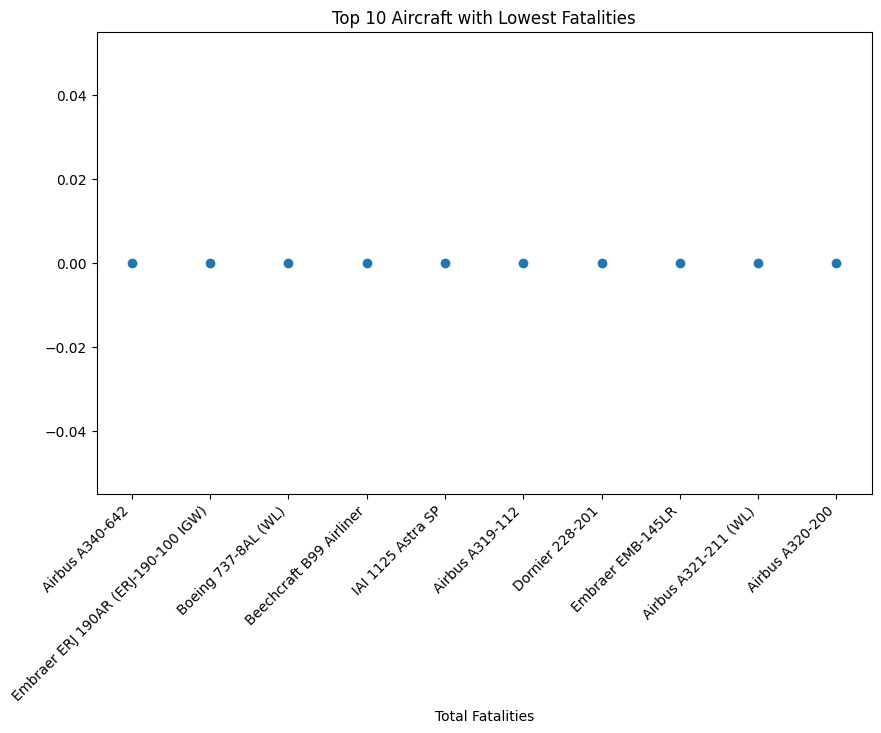

In [120]:
# Scatter graph of the top 10 safest aircraft by fatalities
lowest_fatalities = risk_table.sort_values("total_fatalities").head(10)

plt.figure(figsize=(10,6))
plt.scatter(lowest_fatalities["aircraft_type"], lowest_fatalities["total_fatalities"])
plt.xlabel("Total Fatalities")
plt.title("Top 10 Aircraft with Lowest Fatalities")
plt.xticks(rotation=45, ha='right')


plt.show()

Bar graph of the top 10 aircraft with the fewest accident

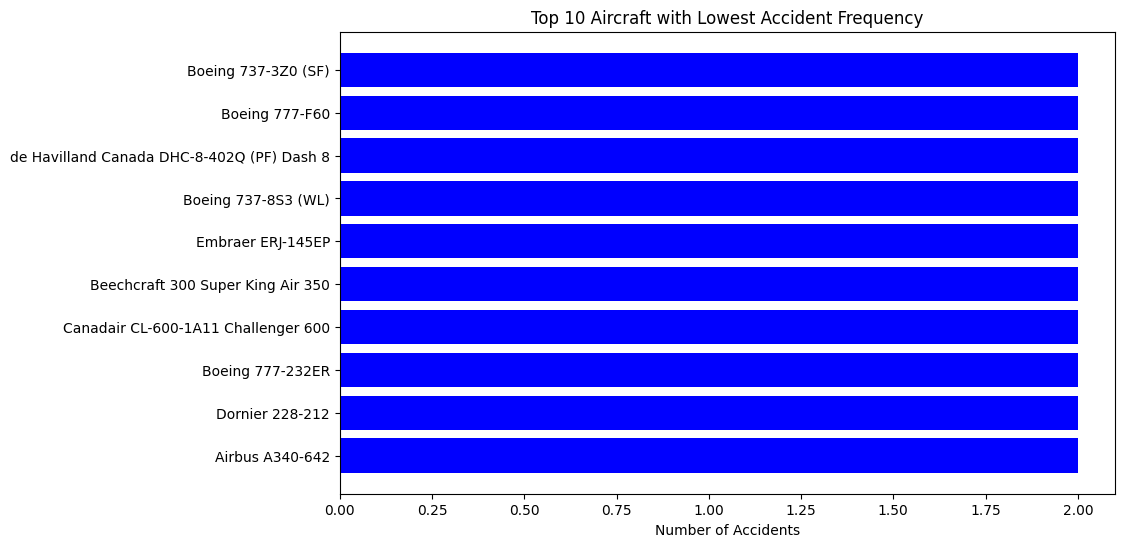

In [121]:
# Bar graph of the top 10 aircraft with the fewest accident
fewest_accidents = risk_table.sort_values("accident_count").head(10)

plt.figure(figsize=(10,6))
plt.barh(fewest_accidents["aircraft_type"], fewest_accidents["accident_count"], color='blue')
plt.xlabel("Number of Accidents")
plt.title("Top 10 Aircraft with Lowest Accident Frequency")

plt.show()


CREATING A NEW CLEANED CSV FILE TO USE IN TABLEAU

In [ ]:
# We rename the type column for consistency
df = df.rename(columns={"type": "aircraft_type"})

In [123]:
df_clean = df.merge(
    accident_counts, on="aircraft_type", how="left"
)

df_clean = df_clean.merge(
    fatalities_by_type, on="aircraft_type", how="left"
)


In [124]:
df_clean.info()
df_clean.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   acc.date          2494 non-null   datetime64[ns]
 1   aircraft_type     2500 non-null   object        
 2   operator          2500 non-null   object        
 3   fat               2500 non-null   float64       
 4   dmg               2500 non-null   object        
 5   accident_count    2500 non-null   int64         
 6   total_fatalities  2500 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 136.8+ KB


,acc.date,aircraft_type,operator,fat,dmg,accident_count,total_fatalities
0,2022-01-03,British Aerospace 4121 Jetstream 41,SA Airlink,0.0,sub,2,0.0
1,2022-01-04,British Aerospace 3101 Jetstream 31,LANHSA - Línea Aérea Nacional de Honduras S.A,0.0,sub,2,0.0
2,2022-01-05,Boeing 737-4H6,Caspian Airlines,0.0,sub,2,0.0
3,2022-01-08,Tupolev Tu-204-100C,"Cainiao, opb Aviastar-TU",0.0,w/o,2,0.0
4,2022-01-12,Beechcraft 200 Super King Air,private,0.0,w/o,58,16.0


In [125]:
df_clean.to_csv("cleaned_flight_risk_data.csv", index=False)
